In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '../data/raw/Датасет3_Дтп.xlsx'
dataset_name = path.split('/')[-1][:-5]

df = pd.read_excel(path, index_col='Время регистрации', parse_dates=True)
df = df[(df['Широта']!=0) & (df['Долгота']!=0)]
print(df.shape)
df.head(3)

(21493, 6)


,Категория,Идентификатор Еас адреса,Идентификатор Еас здания,Широта,Долгота,Район
Время регистрации,,,,,,
2019-01-01 01:01:13,ДТП с пострадавшими людьми,NaN,NaN,59.937400,30.282000,Василеостровский
2019-01-01 01:01:49,ДТП с пострадавшими людьми,NaN,197864.0,59.936924,30.282853,Василеостровский
2019-01-01 01:01:53,ДТП с пострадавшими людьми,NaN,93814.0,59.946515,30.271703,Василеостровский


In [3]:
df.describe()

,Идентификатор Еас адреса,Идентификатор Еас здания,Широта,Долгота
count,6470.00000,13521.000000,21493.000000,21493.000000
mean,250660.74204,77013.327269,59.920305,30.322673
std,305905.90305,53171.075190,0.147169,0.179949
min,12.00000,6.000000,43.143700,28.324718
25%,42375.00000,35261.000000,59.855621,30.262900
50%,98286.00000,71063.000000,59.926505,30.335184
75%,449148.75000,104783.000000,59.988717,30.406000
max,959234.00000,216955.000000,60.873600,45.898800


(59.7, 60.25)

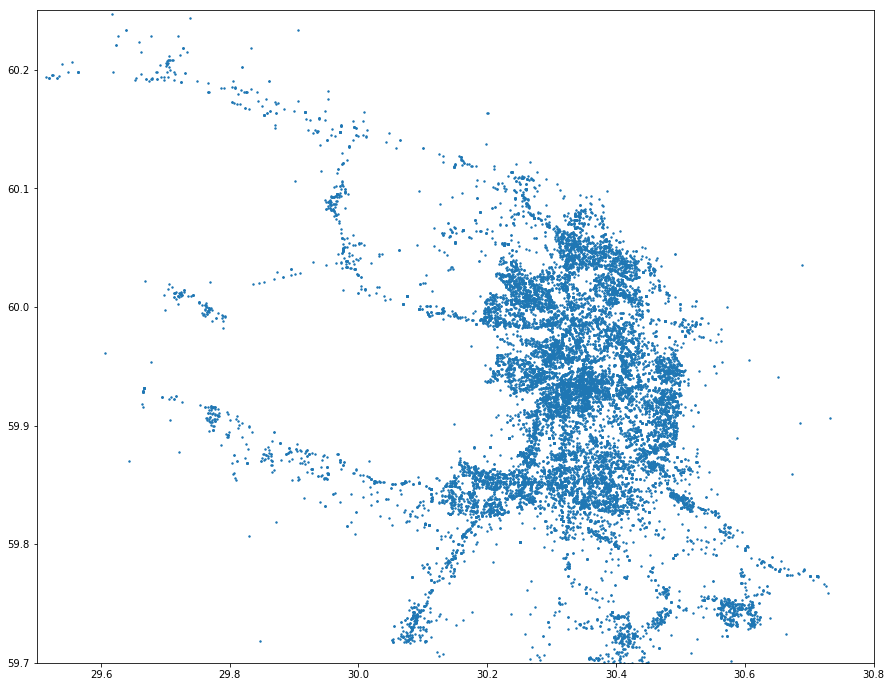

In [4]:
# all events
_ = plt.figure(figsize=(15, 12))
plt.scatter(df['Долгота'], df['Широта'], s=2)
plt.xlim(29.5, 30.8)
plt.ylim(59.7, 60.25)

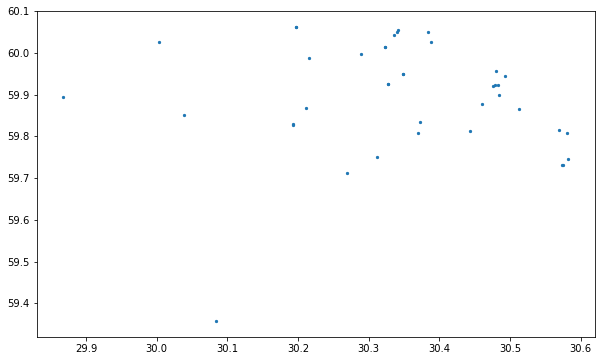

In [5]:
# look at one week events
subdf = df.loc['2020-08-12' : '2020-08-25']
_ = plt.figure(figsize=(10, 6))
plt.scatter(subdf['Долгота'], subdf['Широта'], s=5)
# plt.xlim(29.5, 30.8)
# plt.ylim(59.7, 60.25)

# Look at SMA of event messages

In [9]:
import time
to_timestamp = lambda strdate: time.mktime(time.strptime(str(strdate), '%Y-%m-%d %H:%M:%S'))

In [23]:
events = list(map(to_timestamp, df.index.tolist()))
x = sorted(list(set(events)))
y = [events.count(i) for i in x]

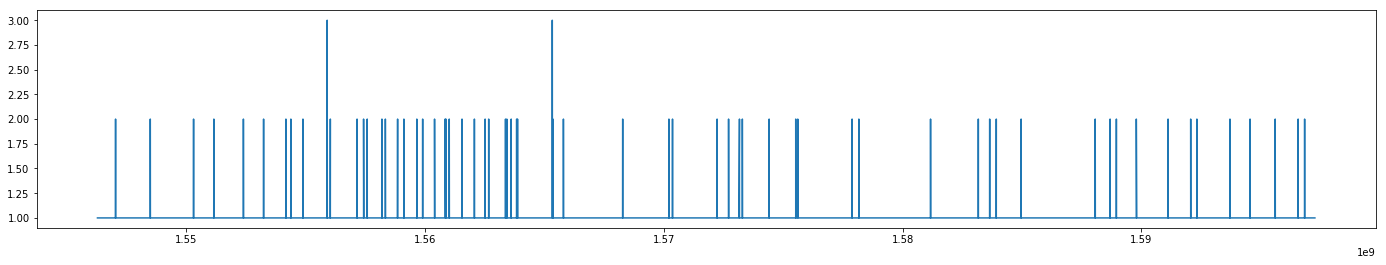

In [24]:
_ = plt.figure(figsize=(24, 4))
_ = plt.plot(x, y)

In [33]:
def smooth(arr, window_size):
    smoothed = []
    for i in range(window_size, len(arr)):
        avg = sum(arr[i-window_size:i]) / window_size
        smoothed.append(avg)
    return [0] * window_size + smoothed

In [73]:
def scale(x, y, k=60):
    newx, newy = [], []
    frm = int(min(x))
    to  = int(max(x))
    i = 0
    for s in range(frm, to, k):
        while x[i] < s:
            i += 1
        j = i
        while x[j] < min(to, s+k):
            j += 1
        vals = y[i:j]
        newx.append(len(newx))
        newy.append(sum(vals))
    return newx, newy

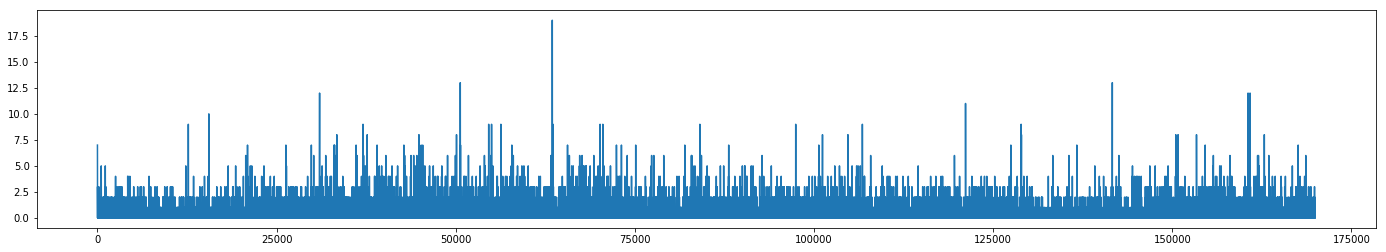

In [157]:
fminutex, fminutey = scale(x, y, k=5*60)

_ = plt.figure(figsize=(24, 4))
_ = plt.plot(fminutex, fminutey)

In [141]:
def get_threshold(seq):
    seq = sorted(list(set(seq)))
    t = (seq[-1] - seq[1])/3 + seq[1]
    return t

In [142]:
get_threshold(fminutey)

7.0

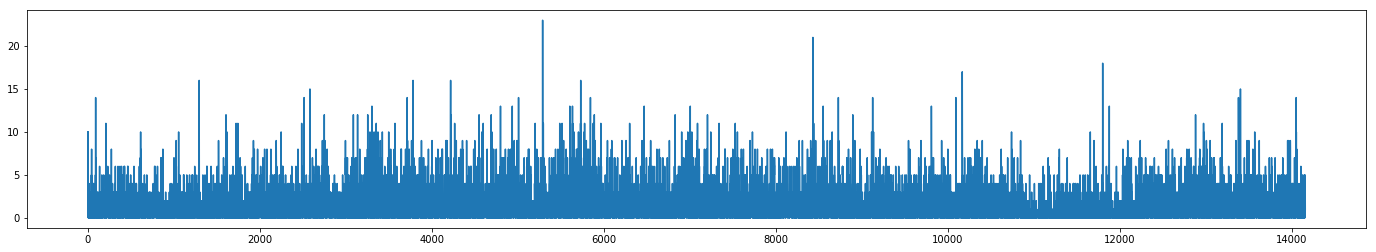

In [78]:
# minutex, minutey = scale(x, y, k=60)
hourx, houry = scale(x, y, k=60*60)

_ = plt.figure(figsize=(24, 4))
_ = plt.plot(hourx, houry)

In [143]:
get_threshold(houry)

8.333333333333332

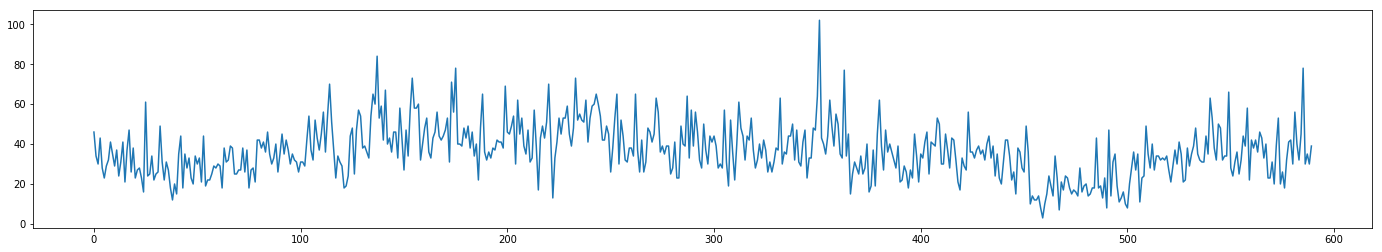

In [152]:
# minutex, minutey = scale(x, y, k=60)
# hourx, houry = scale(x, y, k=60*60)
dayx, dayy = scale(x, y, k=60*60*24)

_ = plt.figure(figsize=(24, 4))
_ = plt.plot(dayx, dayy)

In [153]:
get_threshold(dayy)

38.66666666666667

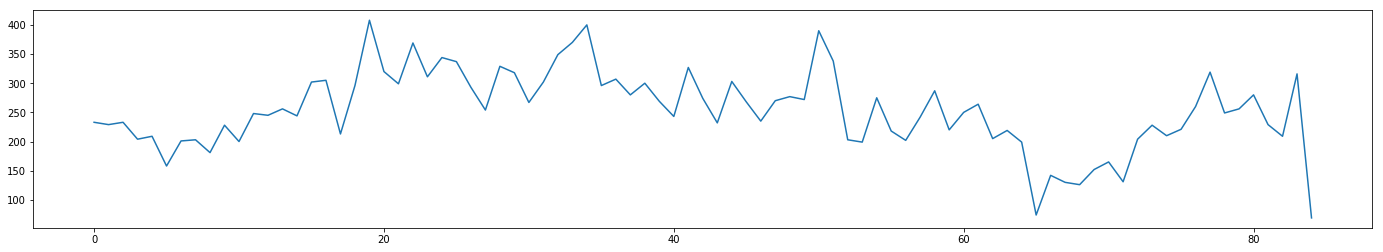

In [151]:
dayx, dayy = scale(x, y, k=60*60*24*7)

_ = plt.figure(figsize=(24, 4))
_ = plt.plot(dayx, dayy)

In [149]:
sum(dayy)/len(dayy)

35.97239709443098

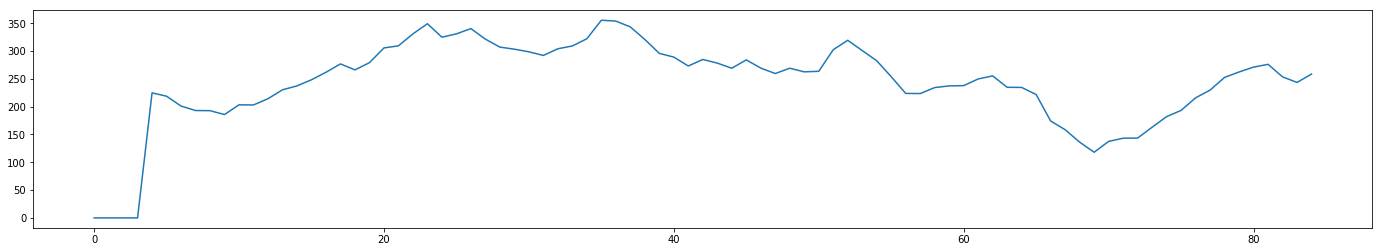

In [91]:
# minutex, minutey = scale(x, y, k=60)
# hourx, houry = scale(x, y, k=60*60)
# dayx, dayy = scale(x, y, k=60*60*24)
weekx, weeky = scale(x, y, k=60*60*24*7)

_ = plt.figure(figsize=(24, 4))
_ = plt.plot(weekx, smooth(weeky, 4))